<a href="https://colab.research.google.com/github/halimahbukirwa/KingCountyHouse/blob/main/KingCountyHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)

## **EXPLORATORY DATA ANALYSIS**




In [3]:
# First 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Last 5 rows
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
# rows and columns
df.shape

(21613, 21)

In [6]:
#columns
# df.columns

# Evaluation
# MSE
# RMSE
# MAE
# R2
# Visualization of the prediction vs the ground truth/ true values

In [7]:
#describing the data (numerical columns)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **DATA CLEANING**

In [8]:
# Finding more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
# Finding duplicate values
df.duplicated().sum()

0

In [10]:
#finding total null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**The data is clean, proceed to further analysis**

In [11]:
new = df[['bedrooms','bathrooms','price','floors']]
new.head(20)

,bedrooms,bathrooms,price,floors
0,3,1.00,221900.0,1.0
1,3,2.25,538000.0,2.0
2,2,1.00,180000.0,1.0
3,4,3.00,604000.0,1.0
4,3,2.00,510000.0,1.0
5,4,4.50,1225000.0,1.0
6,3,2.25,257500.0,2.0
7,3,1.50,291850.0,1.0
8,3,1.00,229500.0,1.0
9,3,2.50,323000.0,2.0


In [12]:
#making grade values as categories of A B C D E F G H I J K L and M
df['grade'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64>

In [13]:
df['grade'] = df['grade'].astype('category')

In [14]:
df['grade']= df['grade'].cat.rename_categories({1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8:'H', 9:'I', 10: 'J', 11: 'K', 12:'L', 13: 'M'})

In [15]:
df['grade'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of G    8981
H    6068
I    2615
F    2038
J    1134
K     399
E     242
L      90
D      29
M      13
C       3
A       1
Name: grade, dtype: int64>

In [16]:
#making waterfront values as categories of True and False
df['waterfront'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    21450
1      163
Name: waterfront, dtype: int64>

In [17]:
df['waterfront'] = df['waterfront'].astype('category')

In [18]:
df['waterfront'] = df['waterfront'].cat.rename_categories({0: 'False',1: 'True'})

In [19]:
df['waterfront'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of False    21450
True       163
Name: waterfront, dtype: int64>

In [20]:
#making floors values as categories of First, Second, Third, Fourth, Fifth and Sixth
df['floors'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64>

In [21]:
df['floors'] = df['floors'].astype('category')

In [22]:
df['floors'] = df['floors'].cat.rename_categories({1.0: 'First', 1.5: 'Second', 2.0: 'Third', 2.5: 'Fourth', 3.0: 'Fifth', 3.5: 'Sixth'})

In [23]:
df['floors'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of First     10680
Third      8241
Second     1910
Fifth       613
Fourth      161
Sixth         8
Name: floors, dtype: int64>

In [24]:
#making condition values as categories of poor, bad, fair, good, and excellent
df['condition'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64>

In [25]:
#df['condition'] = df['condition'].astype('category')

In [26]:
#f['condition']= df['condition'].cat.rename_categories({1: 'poor',2: 'bad', 3: 'fair', 4: 'good', 5:'excellent'})

In [27]:
#df['condition'].value_counts().sum

In [28]:
#making view values as categories of A, B, C, and D
df['view'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64>

In [29]:
df['view']= df['view'].astype('category')

In [30]:
df['view']= df['view'].cat.rename_categories({1: 'A', 2: 'B', 3: 'C', 4: 'D'})

In [31]:
df['view'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0    19489
B      963
C      510
A      332
D      319
Name: view, dtype: int64>

In [32]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [33]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,First,False,0,...,G,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,Third,False,0,...,G,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,First,False,0,...,F,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,First,False,0,...,G,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,First,False,0,...,H,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,First,False,0,...,K,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,Third,False,0,...,G,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,First,False,0,...,G,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,First,False,0,...,G,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,Third,False,0,...,G,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [34]:
df['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64

In [35]:
dates = df[['date','yr_built', 'yr_renovated']]
dates.head(20)


,date,yr_built,yr_renovated
0,20141013T000000,1955,0
1,20141209T000000,1951,1991
2,20150225T000000,1933,0
3,20141209T000000,1965,0
4,20150218T000000,1987,0
5,20140512T000000,2001,0
6,20140627T000000,1995,0
7,20150115T000000,1963,0
8,20150415T000000,1960,0
9,20150312T000000,2003,0


In [36]:
dates.tail(20)

,date,yr_built,yr_renovated
21593,20150317T000000,2006,0
21594,20141017T000000,2008,0
21595,20141031T000000,2006,0
21596,20140813T000000,2014,0
21597,20150421T000000,2007,0
21598,20141013T000000,2014,0
21599,20140915T000000,2003,0
21600,20141015T000000,2008,0
21601,20150407T000000,2008,0
21602,20140626T000000,2014,0


## **WORD CLOUD**

In [37]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


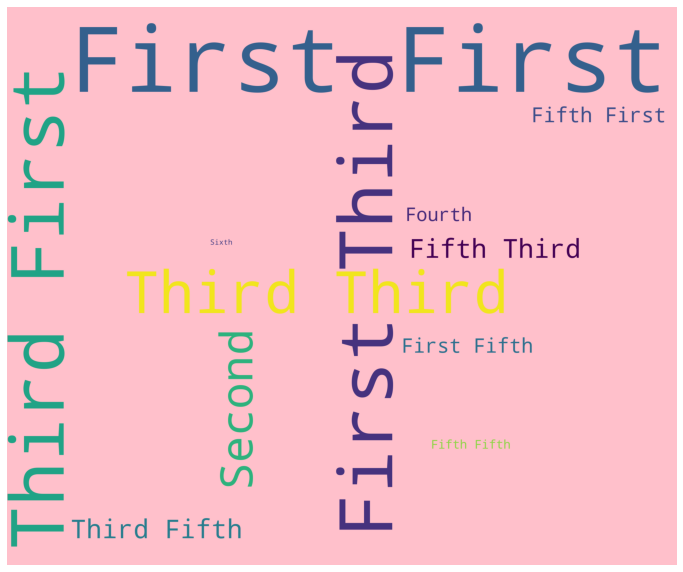

In [38]:
from wordcloud import WordCloud,STOPWORDS
corpus = ' '.join(df['floors'].astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='pink', width=2400, height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [39]:
#They people do not renovate their houses

In [40]:
# bedrooms, bathrooms, sqft_living, condition

In [41]:
X = df[['bedrooms','bathrooms','sqft_living','condition']]
X.head(10)

,bedrooms,bathrooms,sqft_living,condition
0,3,1.00,1180,3
1,3,2.25,2570,3
2,2,1.00,770,3
3,4,3.00,1960,5
4,3,2.00,1680,3
5,4,4.50,5420,3
6,3,2.25,1715,3
7,3,1.50,1060,3
8,3,1.00,1780,3
9,3,2.50,1890,3


In [42]:
y = df['price']
y.head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1225000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: price, dtype: float64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
predictions = model.predict(X_test)

In [48]:
predctions_df = pd.DataFrame(predictions,columns=['Predicted Price'])

In [49]:
predctions_df.head()

,Predicted Price
0,5.300888e+05
1,7.834878e+05
2,9.964405e+05
3,1.312424e+06
4,6.898075e+05


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


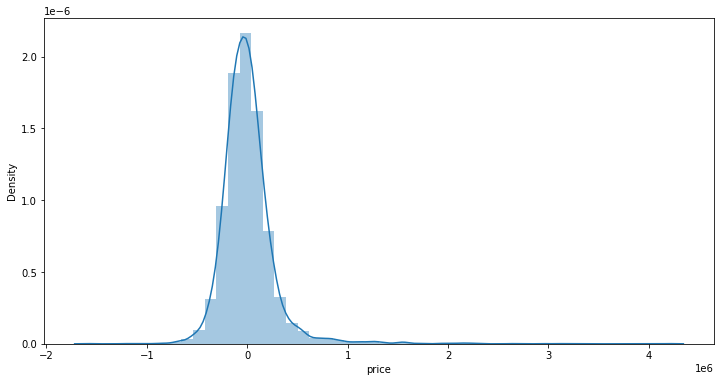

In [50]:
plt.figure(figsize=(12,6))
sns.distplot((y_test-predictions))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


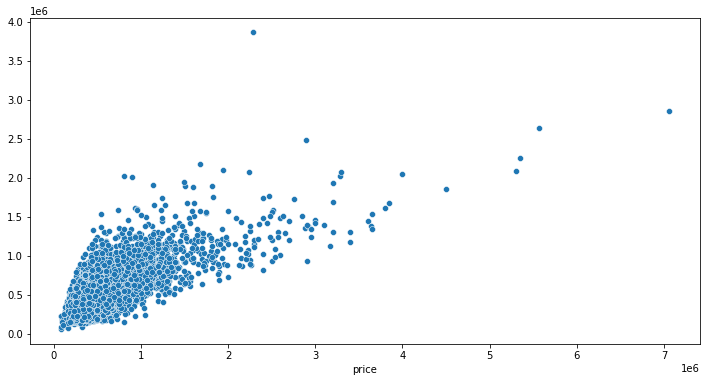

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(y_test,predictions)

In [52]:
from sklearn import metrics


In [53]:
print('The Mean Absolute Error is', metrics.mean_absolute_error(y_test, predictions))

The Mean Absolute Error is 172219.22832705264


In [54]:
print('The Mean Squarred Error is ', metrics.mean_squared_error(y_test, predictions))

The Mean Squarred Error is  73151907039.8175


In [55]:
print('Root Mean Squared Error is ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error is  270466.0922182622


In [56]:
print('R2 is ', np.sqrt(metrics.r2_score(y_test, predictions)))

R2 is  0.715154315332323


In [57]:
print('R2 is ', metrics.r2_score(y_test, predictions))

R2 is  0.5114456947384436


In [58]:
#encode the categorical data
#add more columns (all of them)
#explore the columns (corr)
#visualizations(Histogram, distplot for numerical data)

# Sacling, normalization - improve the model
